# Simulation result data analysis

Author: Yaolin Ge
Email: geyaolin@gmail.com
Date: 2023-05-29

### Notes: 
1. Simulation result data is stored in the folder: Nidelva3D/mafia2_simulation_result. 
2. The folder contains the replicate result stored in the name format: `R_000` etc. 
3. One should gather all the replicate data. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
datafolder = os.getcwd() + "/Nidelva3D/mafia2_simulation_result/"
files = os.listdir(datafolder)
files.sort()

IBV = []
VR = []
RMSE = []

for file in files: 
    if file != ".DS_Store":
        filepath = datafolder + file + "/"
        df = pd.read_csv(filepath + "metrics.csv")
        IBV.append(np.stack((df["ibv_grf"].to_numpy(), df['ibv_gmrf'].to_numpy()), axis=1))
        VR.append(np.stack((df["vr_grf"].to_numpy(), df['vr_gmrf'].to_numpy()), axis=1))
        RMSE.append(np.stack((df["rmse_grf"].to_numpy(), df['rmse_gmrf'].to_numpy()), axis=1))

IBV = np.array(IBV)
VR = np.array(VR)
RMSE = np.array(RMSE)

def percentize_metric(value):
    for i in range(value.shape[0]):
        value[i, :, 0] = (value[i, :, 0] - value[i, 0, 0]) / value[i, 0, 0] * 100
        value[i, :, 1] = (value[i, :, 1] - value[i, 0, 1]) / value[i, 0, 1] * 100
    return value

ibv = percentize_metric(IBV)
vr = percentize_metric(VR)
rmse = percentize_metric(RMSE)


Text(0, 0.5, 'RMSE (%)')

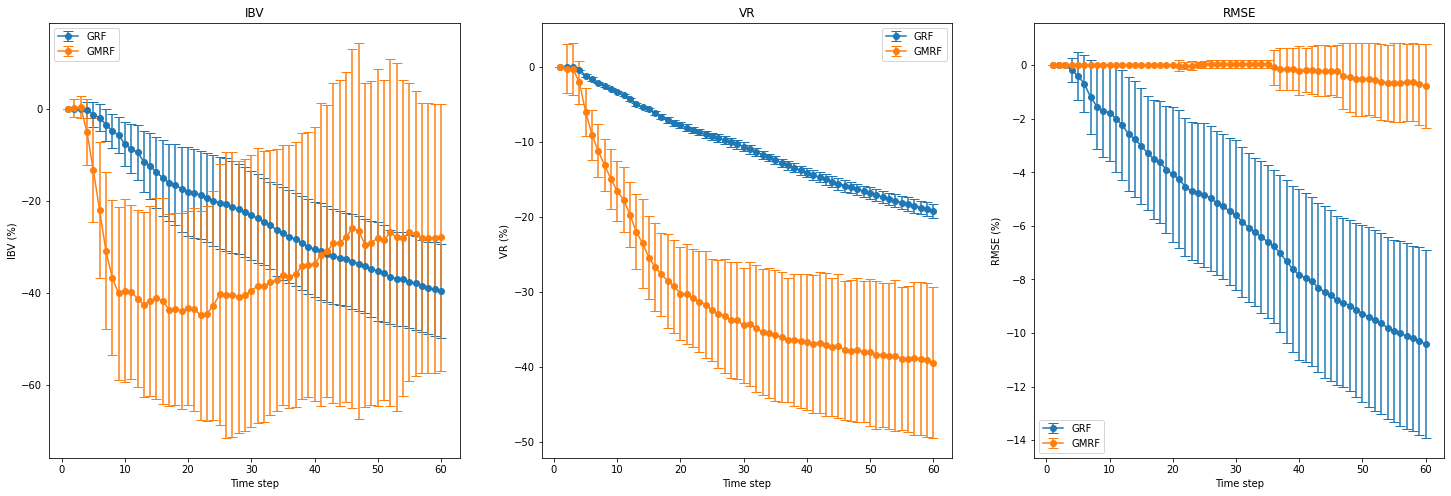

In [3]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1)
plt.title("IBV")
plt.errorbar(np.arange(1, ibv.shape[1]+1), np.mean(ibv[:, :, 0], axis=0), yerr=np.std(ibv[:, :, 0], axis=0), fmt='-o', capsize=5, label="GRF")
plt.errorbar(np.arange(1, ibv.shape[1]+1), np.mean(ibv[:, :, 1], axis=0), yerr=np.std(ibv[:, :, 1], axis=0), fmt='-o', capsize=5, label="GMRF")
plt.legend()
plt.xlabel("Time step")
plt.ylabel("IBV (%)")

plt.subplot(1, 3, 2)
plt.title("VR")
plt.errorbar(np.arange(1, vr.shape[1]+1), np.mean(vr[:, :, 0], axis=0), yerr=np.std(vr[:, :, 0], axis=0), fmt='-o', capsize=5, label="GRF")
plt.errorbar(np.arange(1, vr.shape[1]+1), np.mean(vr[:, :, 1], axis=0), yerr=np.std(vr[:, :, 1], axis=0), fmt='-o', capsize=5, label="GMRF")
plt.legend()
plt.xlabel("Time step")
plt.ylabel("VR (%)")

plt.subplot(1, 3, 3)
plt.title("RMSE")
plt.errorbar(np.arange(1, rmse.shape[1]+1), np.mean(rmse[:, :, 0], axis=0), yerr=np.std(rmse[:, :, 0], axis=0), fmt='-o', capsize=5, label="GRF")
plt.errorbar(np.arange(1, rmse.shape[1]+1), np.mean(rmse[:, :, 1], axis=0), yerr=np.std(rmse[:, :, 1], axis=0), fmt='-o', capsize=5, label="GMRF")
plt.legend()
plt.xlabel("Time step")
plt.ylabel("RMSE (%)")



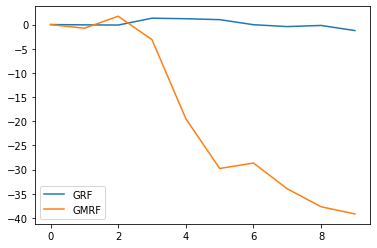

In [32]:
plt.plot(ibv[0, :, 0], label = "GRF")
plt.plot(ibv[0, :, 1], label = "GMRF")
plt.legend()


0    2998.440123
1    2998.440209
2    2998.440245
3    2998.448256
4    2998.455807
5    2998.455751
6    2998.454865
7    2998.454635
8    2998.454966
9    2998.454935
Name: rmse_gmrf, dtype: float64